## Import All The Necessary Library

In [42]:
import glob
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from collections import Counter
from scipy.stats import chi2_contingency, kruskal
from transformers import AutoModelForSequenceClassification, pipeline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

font = {'size'   : 45}

matplotlib.rc('font', **font)

## Load The Dataset

In [32]:
# Load English dataset
df_en = pd.read_csv('/content/drive/MyDrive/politics-and-virality-twitter/data/annotation/en/en_combined.csv')

# Load Spanish dataset
df_es = pd.read_csv('/content/drive/MyDrive/politics-and-virality-twitter/data/annotation/es/es_combined.csv')

# Load Greek dataset
df_gr = pd.read_csv('/content/drive/MyDrive/politics-and-virality-twitter/data/annotation/gr/gr_combined.csv')


## Sentiment Distribution - Overall

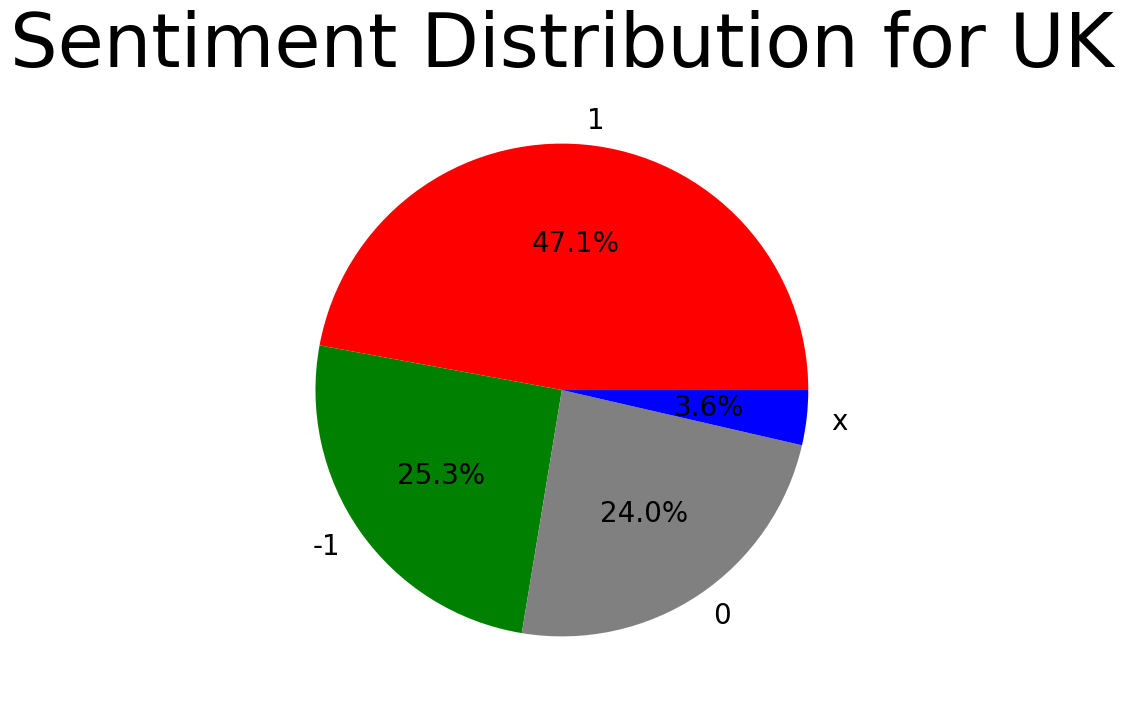

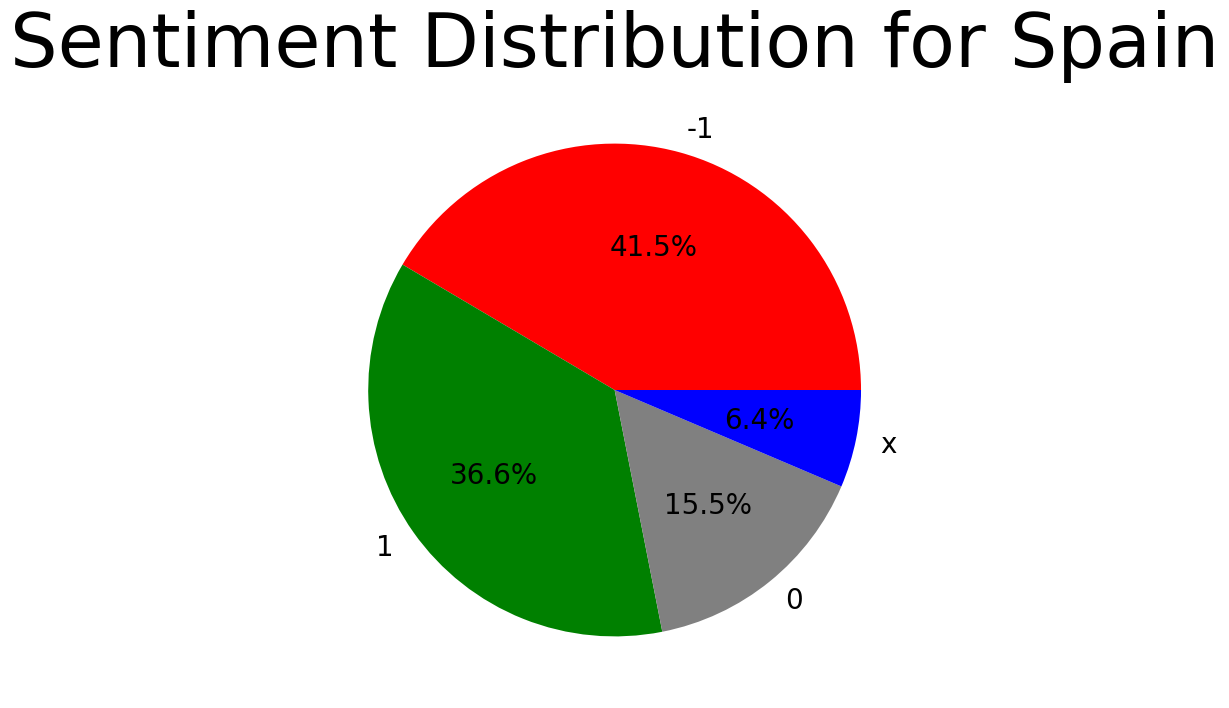

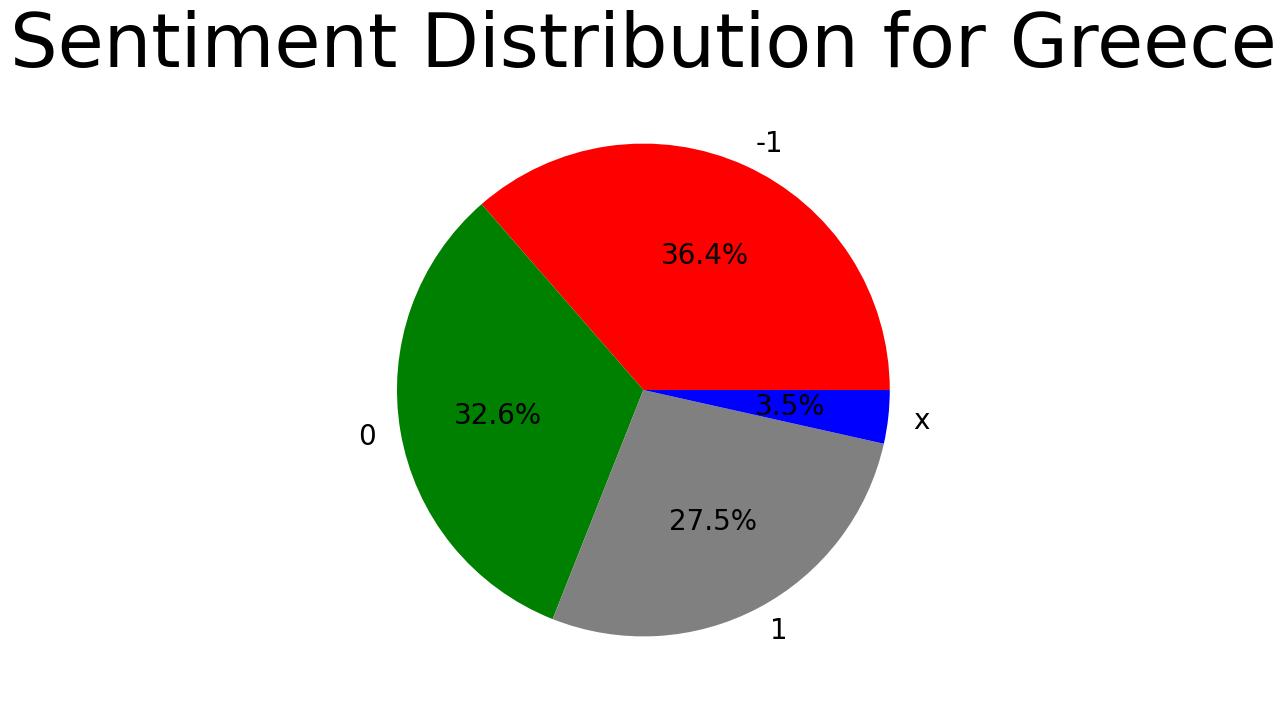

In [43]:
# Define a function to plot sentiment distribution as a pie chart for a given country
def plot_sentiment_distribution(df, country_name):
    sentiment_counts = df['label'].value_counts(normalize=True)
    sentiment_labels = sentiment_counts.index # Extract the labels and their corresponding percentage values
    sentiment_values = sentiment_counts.values # Extract the labels and their corresponding percentage values

    # Plot pie chart with custom colors and percentage annotations
    plt.figure(figsize=(8, 8))
    plt.pie(
        sentiment_values,
        labels=sentiment_labels,
        autopct='%1.1f%%',
        colors=['red', 'green', 'grey', 'blue'],
        textprops={'fontsize': 20})
    plt.title(f"Sentiment Distribution for {country_name}")
    plt.show()

# Call the function for each country to generate the pie charts
plot_sentiment_distribution(df_en, "UK")
plot_sentiment_distribution(df_es, "Spain")
plot_sentiment_distribution(df_gr, "Greece")


This pie chart illustrates the Overall sentiment distribution for tweets from UK, Spain, and Greece. The distribution shows how the tweets are categorized into three sentiment labels:

Positive (1): This represents tweets that convey positive sentiment.

Negative (-1): These tweets express a negative sentiment.

Neutral (0): This group includes tweets that are neutral in tone.

Uncertain (x): These represent tweets with unclear or uncertain sentiment, which could be due to ambiguity or incomplete labeling.

**From the chart, we can observe that:**

A significant portion of tweets are labeled as positive or negative, with a relatively smaller proportion marked as neutral or uncertain.

These findings can help us understand the general tone of political discourse on Twitter in each respective country, shedding light on how political communication might be perceived by the public.

##Sentiment Analysis with XLM-T-Sent
Load the model and perform sentiment analysis on a sample tweet.

In [44]:
# Load pretrained model
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/xlm-twitter-politics-sentiment')
sentiment_analysis_task = pipeline("sentiment-analysis", model=model, tokenizer="cardiffnlp/twitter-xlm-roberta-base-sentiment")

# Test on a sample tweet
result = sentiment_analysis_task('Today is a good day')
print(result)


Device set to use cpu


[{'label': 'Positive', 'score': 0.9786149263381958}]


The result shows that the model classifies the text as Positive with a high confidence score of 97.86%.